# HST - RGB image

This notebook produces an RGB (3-colour) image from Hubble Space Telescope (HST) observations of the galaxy NGC 4321.

We use the following filters:
* red = `F814W`
* green = `F555W`
* blue = `F438W`

There are several packages in `python` that can create RGB and 3-colour images from a stack of images. Here, we use the `make_lupton_rgb` function, included in the `astropy` package: https://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html

**Lupton RGB** uses an *arcsinh* stretch to scale the color of each individual filter, which is typically a good choice for astronomical images. The function is based on **Lupton et al. 2004** (https://ui.adsabs.harvard.edu/abs/2004PASP..116..133L/abstract), who suggest an optimal algorithm for producing red-green-blue (RGB) composites from three-band astronomical images.

We use HST observations of the nearby, spiral galaxy NGC 4321 (M100). 
The data is part of the PHANGS-HST survey and publicly available via: https://archive.stsci.edu/hlsp/phangs/phangs-hst#section-d345b9ad-ea5b-4f39-9055-66a5db16fc75
Here, we use the drizzled science image, which are the science-ready images.

### Load packages

In [1]:
import numpy as np  # work with data as numpy arrays
from astropy.io import fits  # load FITS files
from astropy.wcs import WCS  # coordinate system from FITS file
import matplotlib.pyplot as plt  # plotting
from astropy.visualization import make_lupton_rgb  # RGB image from 3 images, using arcsinh stretch
from PIL import Image, ImageEnhance  # image manipulation
import warnings
warnings.filterwarnings("ignore")  # mute warnings

### Load data

In [2]:
# directories
data_dir = '../data/'  # data directory, edit as needed
image_dir = '../images/' # directory to save created images, edit as needed

In [3]:
# file names
galaxy = 'ngc4321'
hst_438_fits = data_dir + 'hst/' + galaxy + '_f438w_exp_drc_sci.fits'
hst_555_fits = data_dir + 'hst/' + galaxy + '_f555w_exp_drc_sci.fits'
hst_814_fits = data_dir + 'hst/' + galaxy + '_f814w_exp_drc_sci.fits'

# load fits files
hst_438 = fits.getdata(hst_438_fits)
hst_555 = fits.getdata(hst_555_fits)
hst_814 = fits.getdata(hst_814_fits)

# load word coordinate system (WCS)
# all HST images have the same WCS, so pick one
hst_814_header = fits.getheader(hst_814_fits)  # load header
wcs_hst = WCS(hst_814_header)  # get WCS from header

### Create RGB image

In [4]:
# trim peaks
saturation = 99.99999 # outlier percentile
hst_438[hst_438>np.nanpercentile(hst_438, saturation)] = np.nanpercentile(hst_438, saturation)
hst_555[hst_555>np.nanpercentile(hst_555, saturation)] = np.nanpercentile(hst_555, saturation)
hst_814[hst_814>np.nanpercentile(hst_814, saturation)] = np.nanpercentile(hst_814, saturation)

# relative scaling of colours
scaling_red = 1
scaling_green = 0.7
scaling_blue = 0.5

# define red, green, and blue images
image_r = hst_814/np.nanmax(hst_814) * scaling_red
image_g = hst_555/np.nanmax(hst_555) * scaling_green
image_b = hst_438/np.nanmax(hst_438) * scaling_blue

# make 3-color image
hst_fname = image_dir + galaxy + '_hst_rgb_image.jpg'
image_hst = make_lupton_rgb(image_r, image_g, image_b, minimum=0, stretch=0.0007, Q=5, filename=hst_fname)

# edit saturation
image_hst = Image.open(hst_fname)
converter = ImageEnhance.Color(image_hst)
image_hst = converter.enhance(0.6)

# save image to jpg
image_hst.save(hst_fname)

### Plotting

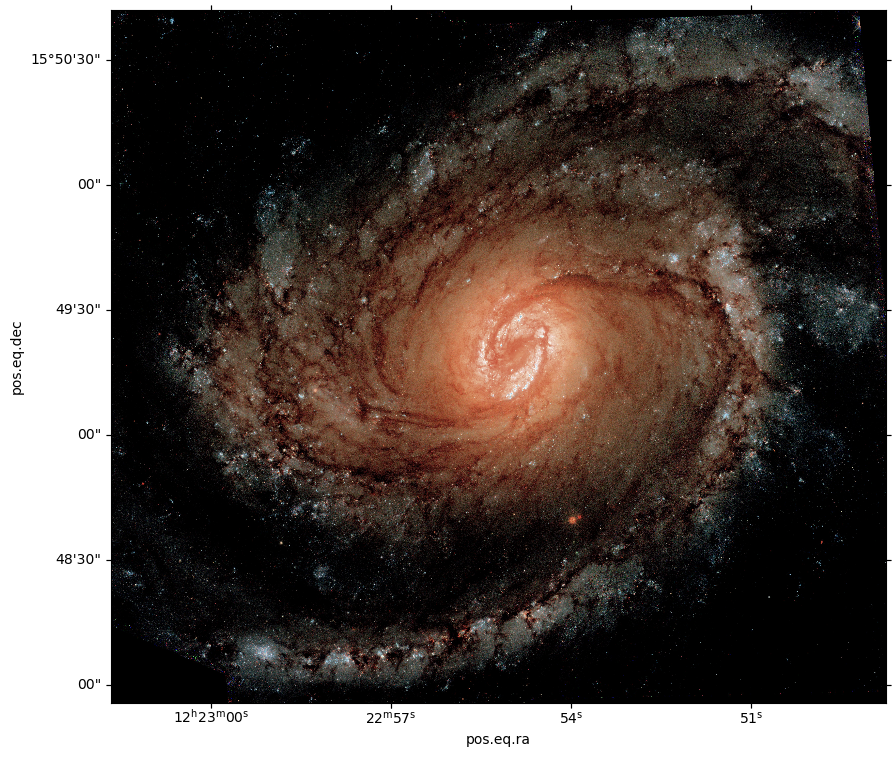

In [5]:
# plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=wcs_hst)

# plot rgb image
im = ax.imshow(image_hst, transform=ax.get_transform(wcs_hst))

# cutout
plt.xlim(3300,8000)
plt.ylim(2800,7000)

plt.show()